In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from collections import Iterable

In [2]:
g = 9.8 # m s^-2
l = 2000e3 # m
beta = 1/4
D = 0.67
kappa = 1e-6 # m^2 s^-1
C_p = 1200
alpha = 2e-5
k = 3
rho = 3000
nu = 2e17
T_s = 273
T_0 = 1800
Gyr2s = 31557600*1e9

tf = 5e-06 Gyr
E0 0.30719565329288456


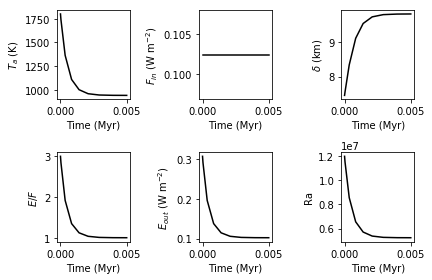

In [33]:
def Ra(T_a):
    return g*alpha*T_a*l**3/(kappa*nu)

def lid_thickness(T_a, E):
    return k*T_a/(2*E)
    
def F_in(T_a, t=None, F0=None):
    """Heat flux per unit area through bottom of convecting layer"""
    if F0 is None:
        return k*(g*alpha/(kappa*nu))**(beta/(1 - beta)) * l**(4*beta/(1 - beta)) * (D*T_a)**(1/(1 - beta))
    else:
        return F0
    

def E_out(T_a):
    """Heat flux per unit area out of top of convecting layer"""
    return k*(g*alpha/(kappa*nu))**(1/3) * (D*T_a)**(4/3)

def H_in():
    """Internal heat generation per unit volume in convecting layer"""
    return 0

def T0_ss():
    """Steady state temperature to calculate initial fluxes where F0=3E0"""
    return T

def dTdt(t, T_avg, F0=None):
    deltaT = T_avg - T_s
    F = F_in(deltaT, t, F0)
    E = E_out(deltaT)
    H = H_in()
    #print('t =',t/Gyr2s, 'Gyr, T_avg =', T_avg, 'K, F =',F,'W m^-2, E =', E, 'W m^-2') 
    #print('E/F', E/F)
    return ((F - E) + H*l)/(rho*C_p)

def evolve(tf=None, t0=0):
    print('tf =',tf/Gyr2s, 'Gyr')
    E0 = E_out(T_0-T_s)
    print('E0', E0)
    f = integrate.solve_ivp(fun=lambda t, y: dTdt(t, y, F0=E0/3), t_span=(t0,tf), y0=[T_0], method='RK45')

    F = [F_in(f.y[0]-T_s, t=f.t, F0=E_out(T_0-T_s)/3)]*len(f.t)
    E = E_out(np.array(f.y[0])-T_s)

    
    fig, ax = plt.subplots(2, 3)
    ax[0][0].plot(f.t/Gyr2s*1e3, f.y[0], 'k')
    ax[0][0].set_xlabel('Time (Myr)')
    ax[0][0].set_ylabel('$T_{a}$ (K)')
    ax[1][0].plot(f.t/Gyr2s*1e3, E/F, 'k')
    ax[1][0].set_xlabel('Time (Myr)')
    ax[1][0].set_ylabel('$E/F$')
    ax[0][1].plot(f.t/Gyr2s*1e3, F, 'k')
    ax[0][1].set_xlabel('Time (Myr)')
    ax[0][1].set_ylabel('$F_{in}$ (W m$^{-2}$)')
    ax[1][1].plot(f.t/Gyr2s*1e3, E, 'k')
    ax[1][1].set_xlabel('Time (Myr)')
    ax[1][1].set_ylabel('$E_{out}$ (W m$^{-2}$)')
    ax[0][2].plot(f.t/Gyr2s*1e3,lid_thickness(f.y[0]-T_s, E)*1e-3, 'k')
    ax[0][2].set_xlabel('Time (Myr)')
    ax[0][2].set_ylabel('$\delta$ (km)')
    ax[1][2].plot(f.t/Gyr2s*1e3, Ra(f.y[0]-T_s), 'k')
    ax[1][2].set_xlabel('Time (Myr)')
    ax[1][2].set_ylabel('Ra')
    plt.tight_layout()
    return None

evolve(tf=5e-6*Gyr2s)
